In [ ]:
###################################################
#      L08.1 latent factor model practice         #
###################################################

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 파일에서의 구분자 : 탭 / 순서 : user item(movie) rating timestamp

train = pd.read_csv("ml-100k/ml-100k/ua.base",  sep="\t", names=['user', 'item', 'rating', 'timestamp'])
test = pd.read_csv("ml-100k/ml-100k/ua.test",  sep="\t", names=['user', 'item', 'rating', 'timestamp'])

In [3]:
items = torch.LongTensor(train['item'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['item'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [4]:
print(items.shape)
print(users.shape)
print(ratings.shape)

# m*n 벡터가 있을 때, n을 다른 말로 rank 라고도 부름. rank 커지면 메모리 차지 많이 함.

torch.Size([90570])
torch.Size([90570])
torch.Size([90570])


In [5]:
rank = 10

numItems = items.max() + 1
numUsers = users.max() + 1

P = torch.randn(numItems, rank, requires_grad=True) # gradient 방법으로 update
Q = torch.randn(numUsers, rank, requires_grad=True)

In [6]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
    h = torch. sum(P[items] * Q[users], dim=1)
    # h = (P[items] * Q[users]).sum(dim=1)
    cost = mse(h, ratings)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    with torch.no_grad():
        X.append(epoch)
        Y.append(cost.item())
        
        h_test = (P[items_test] * Q[users_test]).sum(dim=1)
        cost_test = mse(h_test, ratings_test)
        
        Y_test.append(cost_test.item())
        
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}, cost_test: {}" .format(epoch, cost.item(), cost_test))
            

epoch: 0, cost: 23.942465, cost_test: 22.057640075683594
epoch: 100, cost: 0.561587, cost_test: 1.5482335090637207
epoch: 200, cost: 0.490569, cost_test: 1.8532471656799316
epoch: 300, cost: 0.467540, cost_test: 2.1634392738342285
epoch: 400, cost: 0.458384, cost_test: 2.5640344619750977
epoch: 500, cost: 0.453228, cost_test: 3.1169028282165527
epoch: 600, cost: 0.449861, cost_test: 3.7299625873565674
epoch: 700, cost: 0.447595, cost_test: 4.310500621795654
epoch: 800, cost: 0.445903, cost_test: 4.87009859085083
epoch: 900, cost: 0.444486, cost_test: 5.432131767272949
epoch: 1000, cost: 0.443301, cost_test: 5.99014139175415


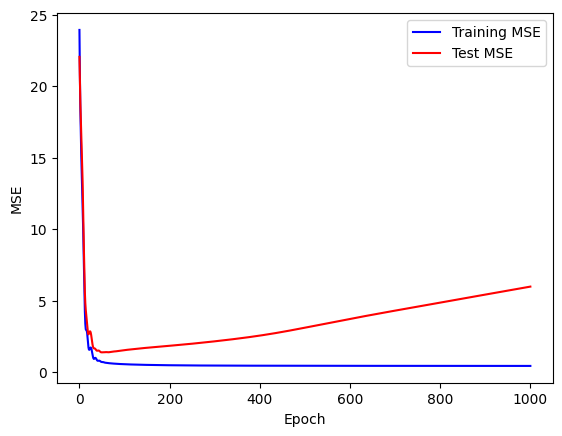

In [8]:
plt.ylabel("MSE")  
plt.xlabel("Epoch")  
plt.plot(X, Y, c="blue", label="Training MSE")  
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()  
plt.show()

## Regularization

In [ ]:
rank = 10
lambda1 = 0.1 # 가중치
lambda2 = 0.1


numItems = items.max() + 1
numUsers = users.max() + 1

mean = ratings.mean()
#mean = (ratings.sum() / len(ratings)).item()

P = torch.randn(numItems, rank, requires_grad=True) # gradient 방법으로 update
Q = torch.randn(numUsers, rank, requires_grad=True)

epoch: 0, cost: 23.477707, cost_test : 21.360754013061523
epoch: 100, cost: 0.560282, cost_test : 1.1198582649230957
epoch: 200, cost: 0.489000, cost_test : 1.1558555364608765
epoch: 300, cost: 0.472101, cost_test : 1.168378233909607
epoch: 400, cost: 0.464914, cost_test : 1.180725336074829
epoch: 500, cost: 0.461250, cost_test : 1.1803773641586304
epoch: 600, cost: 0.459098, cost_test : 1.1818736791610718
epoch: 700, cost: 0.457594, cost_test : 1.1867460012435913
epoch: 800, cost: 0.456629, cost_test : 1.1971570253372192
epoch: 900, cost: 0.456071, cost_test : 1.2044057846069336
epoch: 1000, cost: 0.455718, cost_test : 1.2066766023635864


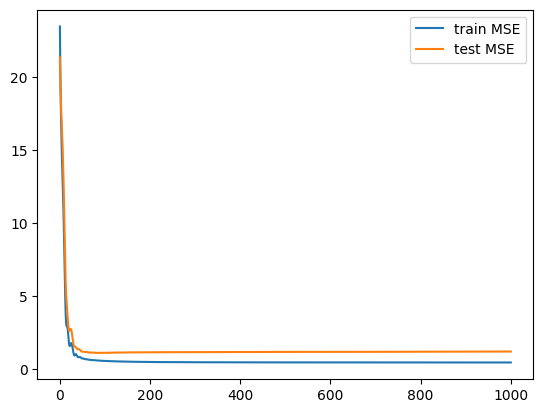

In [ ]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
    h = torch. sum(P[items] * Q[users], dim=1) 
    # h = (P[items] * Q[users]).sum(dim=1)
    cost = mse(h, ratings)
    cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean()
    
    optimizer.zero_grad()
    #cost.backward()
    cost_reg.backward()
    optimizer.step()
    
    with torch.no_grad():
        X.append(epoch)
        Y.append(cost.item())
        
        
        
        h_test = (P[items_test] * Q[users_test]).sum(dim=1)
        cost_test = mse(h_test, ratings_test)
        
        Y_test.append(cost_test.item())
        
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}, cost_test : {}" .format(epoch, cost.item(), cost_test))
            
plt.plot(X, Y, label="train MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend() # 이름이 찍힘
plt.show()


# regularization 으로 overfitting이 조금 해결됐다. cost로 했을 때와, cost_reg로 했을 때 비교해보면 그래프가 올라가지 않음.

Bias 추가

In [ ]:
rank = 10
lambda1 = 0.1 # 가중치
lambda2 = 0.1
lambda3 = 0.1
lambda4 = 0.1


numItems = items.max() + 1
numUsers = users.max() + 1

mean = ratings.mean()

P = torch.randn(numItems, rank, requires_grad=True) # gradient 방법으로 update
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)

epoch: 0, cost: 13.472775, cost_test : 10.01503849029541
epoch: 100, cost: 0.506625, cost_test : 1.1376616954803467
epoch: 200, cost: 0.459928, cost_test : 1.164878487586975
epoch: 300, cost: 0.448589, cost_test : 1.1816140413284302
epoch: 400, cost: 0.443726, cost_test : 1.1882905960083008
epoch: 500, cost: 0.441039, cost_test : 1.2136422395706177
epoch: 600, cost: 0.439843, cost_test : 1.2301762104034424
epoch: 700, cost: 0.439062, cost_test : 1.2375874519348145
epoch: 800, cost: 0.438544, cost_test : 1.2397115230560303
epoch: 900, cost: 0.438255, cost_test : 1.2378939390182495
epoch: 1000, cost: 0.437997, cost_test : 1.2384874820709229


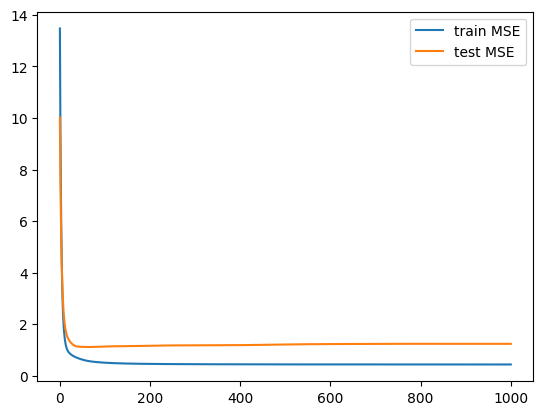

In [ ]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
    h = torch. sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
    # h = (P[items] * Q[users]).sum(dim=1)
    cost = mse(h, ratings)
    cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean() + lambda3 * (bias_item ** 2).mean() + lambda4 * (bias_user ** 2).mean() # regularization
    
    optimizer.zero_grad()
    #cost.backward()
    cost_reg.backward()
    optimizer.step()
    
    with torch.no_grad():
        X.append(epoch)
        Y.append(cost.item())
        
        
        
        h_test = (P[items_test] * Q[users_test]).sum(dim=1) + mean + bias_item[items_test] + bias_user[users_test]
        cost_test = mse(h_test, ratings_test)
        
        Y_test.append(cost_test.item())
        
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}, cost_test : {}" .format(epoch, cost.item(), cost_test))
            
plt.plot(X, Y, label="train MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend() # 이름이 찍힘
plt.show()


# regularization 으로 overfitting이 조금 해결됐다. cost로 했을 때와, cost_reg로 했을 때 비교해보면 그래프가 올라가지 않음.